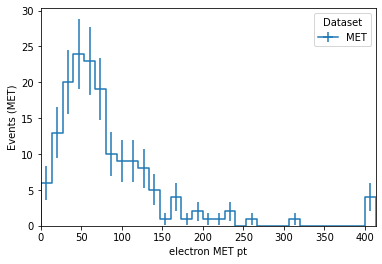

In [1]:
import uproot 
import numpy as np
import coffea
from coffea.nanoaod import NanoEvents
from coffea import hist
from coffea.nanoaod.methods.leptons import *

fname = "/uscms/home/dlehner/nobackup/analysis/data/nanoAOD.root"
events = NanoEvents.from_file(fname,methods={"ElectronBPark":Electron})

mask_length2=events.Electron.counts==2
mask_pt30 = (events.Electron.pt>3).all()
mask = np.logical_and(mask_pt30, mask_length2)

histo1 = hist.Hist(
            "Events (MET)",
            hist.Cat("dataset", "Dataset"),
            hist.Bin("ele_pt", "electron MET pt", 30, 0, 400),
        )
histo1.fill(dataset="MET",ele_pt=events.MET.pt[mask].flatten())

%matplotlib inline
hist.plot1d(histo1, overflow="over")

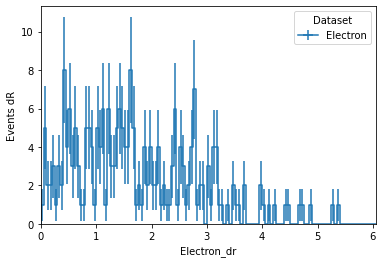

In [2]:
ele_pairs_dR = events.Electron.choose(2).i0.delta_r(events.Electron.choose(2).i1)

histo2 = hist.Hist(
            "Events dR",
            hist.Cat("dataset", "Dataset"),
            hist.Bin("ele_dr", "Electron_dr", 120, 0, 6),
        )
histo2.fill(dataset="Electron",ele_dr=ele_pairs_dR.flatten())

%matplotlib inline
hist.plot1d(histo2, overflow="over")

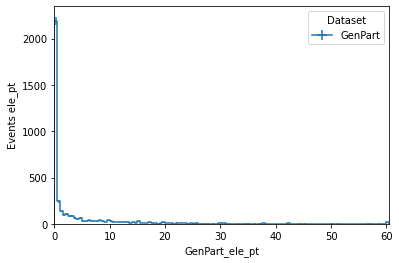

In [3]:
mask_ele = abs(events.GenPart.pdgId)==11
gen_ele_pt = events.GenPart.pt[mask_ele]

histo3 = hist.Hist(
            "Events ele_pt",
            hist.Cat("dataset", "Dataset"),
            hist.Bin("genpart_ele_pt", "GenPart_ele_pt", 120, 0, 60),
        )
histo3.fill(dataset="GenPart",genpart_ele_pt=gen_ele_pt.flatten())

%matplotlib inline
hist.plot1d(histo3, overflow="over")

(0.5, 500)

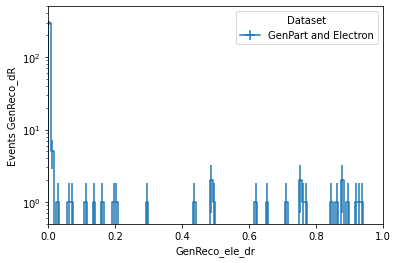

In [4]:
gen_reco_pairs = events.Electron.cross(events.GenPart[mask_ele])
gen_reco_deltar = gen_reco_pairs.i0.delta_r(gen_reco_pairs.i1).min()
histo4 = hist.Hist(
            "Events GenReco_dR",
            hist.Cat("dataset", "Dataset"),
            hist.Bin("gen_reco", "GenReco_ele_dr", 120, 0, 1),
        )
histo4.fill(dataset = "GenPart and Electron", gen_reco = gen_reco_pairs.i0.delta_r(gen_reco_pairs.i1).min()
.flatten())

%matplotlib inline
ax4 = hist.plot1d(histo4)
ax4.set_yscale("log")
ax4.set_ylim(0.5, 500)

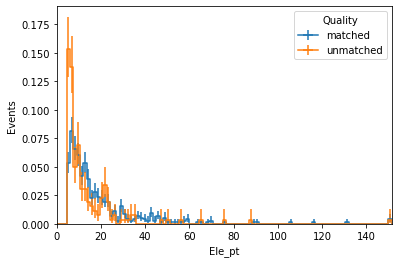

In [5]:
mask_matched = gen_reco_deltar<0.05
mask_unmatched = gen_reco_deltar>=0.05

histo5 = hist.Hist(
            "Events",
            hist.Cat("quality", "Quality"),
            hist.Bin("unmatched_ele", "Ele_pt", 100, 0, 150),
        )

histo5.fill(quality ="unmatched", unmatched_ele=events.Electron[mask_unmatched].pt.flatten())
histo5.fill(quality ="matched", unmatched_ele=events.Electron[mask_matched].pt.flatten())


%matplotlib inline
hist.plot1d(histo5, overflow = "over", density = True)

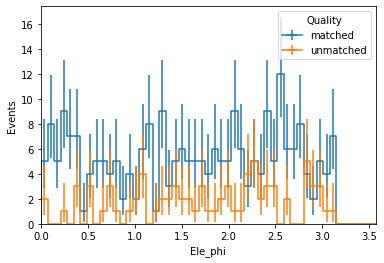

In [6]:
histo6 = hist.Hist(
            "Events",
            hist.Cat("quality", "Quality"),
            hist.Bin("matched_ele_phi", "Ele_phi", 50, 0, 3.5
                ),
        )
histo6.fill(quality ="matched", matched_ele_phi=events.Electron[mask_matched].phi.flatten())
histo6.fill(quality ="unmatched", matched_ele_phi=events.Electron[mask_unmatched].phi.flatten())

%matplotlib inline
hist.plot1d(histo6, overflow = "over")

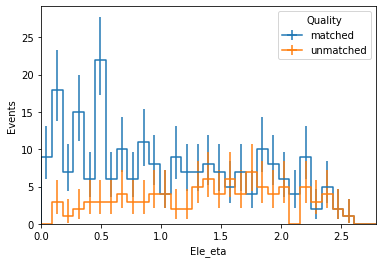

In [7]:
histo7 = hist.Hist(
            "Events",
            hist.Cat("quality", "Quality"),
            hist.Bin("matched_ele_eta", "Ele_eta", 30, 0, 2.7
                ),
        )
histo7.fill(quality ="matched", matched_ele_eta=events.Electron[mask_matched].eta.flatten())
histo7.fill(quality ="unmatched", matched_ele_eta=events.Electron[mask_unmatched].eta.flatten())

%matplotlib inline
hist.plot1d(histo7, overflow = "over")

In [8]:
events.columns

['Pileup',
 'CorrT1METJet',
 'Jet',
 'SubGenJetAK8',
 'run',
 'GenJet',
 'fixedGridRhoFastjetCentral',
 'Flag',
 'fixedGridRhoFastjetCentralNeutral',
 'SoftActivityJetHT5',
 'L1Reco',
 'btagWeight',
 'luminosityBlock',
 'SubJet',
 'Tau',
 'FatJet',
 'GenPart',
 'event',
 'fixedGridRhoFastjetCentralCalo',
 'CaloMET',
 'GenJetAK8',
 'SoftActivityJetHT2',
 'FsrPhoton',
 'TrigObj',
 'L1',
 'SoftActivityJet',
 'GenModel',
 'SoftActivityJetHT',
 'SoftActivityJetNjets5',
 'L1simulation',
 'HLTriggerFinalPath',
 'PV',
 'MET',
 'genTtbarId',
 'SoftActivityJetNjets10',
 'ElectronBPark',
 'Muon',
 'fixedGridRhoFastjetCentralChargedPileUp',
 'GenVisTau',
 'Generator',
 'IsoTrack',
 'PuppiMET',
 'GenMET',
 'SoftActivityJetNjets2',
 'Electron',
 'HTXS',
 'genWeight',
 'HLT',
 'RawMET',
 'TkMET',
 'ChsMET',
 'PSWeight',
 'fixedGridRhoFastjetAll',
 'OtherPV',
 'HLTriggerFirstPath',
 'SV',
 'Photon',
 'GenDressedLepton',
 'SoftActivityJetHT10']

In [9]:
events.ElectronBPark.columns

['dxy',
 'dxyErr',
 'dz',
 'dzErr',
 'eta',
 'fBrem',
 'ip3d',
 'mass',
 'mvaId',
 'pfRelIso',
 'pfmvaId',
 'phi',
 'pt',
 'ptBiased',
 'sip3d',
 'trkRelIso',
 'unBiased',
 'vx',
 'vy',
 'vz',
 'charge',
 'pdgId',
 'convVeto',
 'isLowPt',
 'isPF',
 'isPFoverlap',
 'genPartFlav',
 'matched_jet',
 'matched_gen',
 'matched_photon']

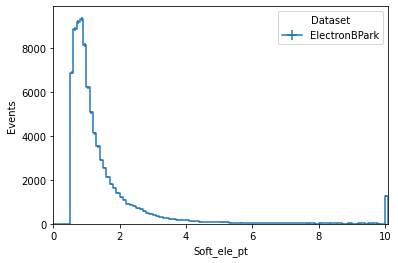

In [10]:
histo8 = hist.Hist(
            "Events",
            hist.Cat("dataset", "Dataset"),
            hist.Bin("soft_ele_pt", "Soft_ele_pt", 100, 0, 10),
        )

histo8.fill(dataset ="ElectronBPark", soft_ele_pt=events.ElectronBPark.pt.flatten())


%matplotlib inline
hist.plot1d(histo8, overflow = "over")

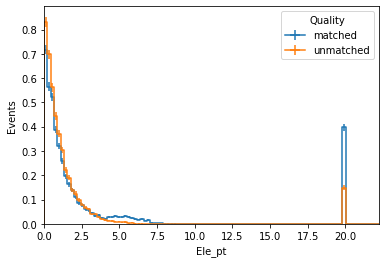

In [11]:
soft_gen_reco_pairs = events.ElectronBPark.cross(events.GenPart[mask_ele])
soft_gen_reco_deltar = soft_gen_reco_pairs.i0.delta_r(soft_gen_reco_pairs.i1).min()

soft_mask_matched = soft_gen_reco_deltar<0.05
soft_mask_unmatched = soft_gen_reco_deltar>=0.05

histo9 = hist.Hist(
            "Events",
            hist.Cat("quality", "Quality"),
            hist.Bin("soft_unmatched_ele", "Ele_pt", 100, 0, 22),
        )

histo9.fill(quality ="unmatched", soft_unmatched_ele=events.ElectronBPark[soft_mask_unmatched].mvaId.flatten())
histo9.fill(quality ="matched", soft_unmatched_ele=events.ElectronBPark[soft_mask_matched].mvaId.flatten())


%matplotlib inline
hist.plot1d(histo9, overflow = "over", density = True)

/uscms/home/tamasan/miniconda3/envs/FireHydrant/lib/python3.8/site-packages/coffea/hist/plot.py:355: RuntimeWarning: invalid value encountered in true_divide
  rsumw = sumw_num / sumw_denom


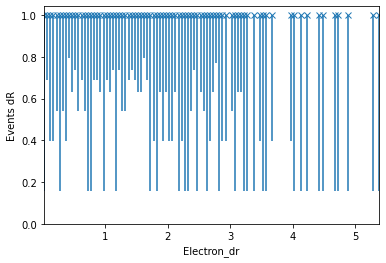

In [12]:
%matplotlib inline
hist.plotratio(num=histo2.integrate("dataset"), denom=histo2.integrate("dataset"), error_opts={"marker": "x"})

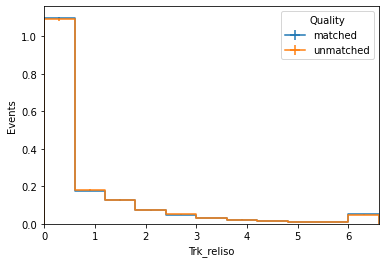

In [25]:
# histo10 = hist.Hist(
#             "Events",
#             hist.Cat("quality", "Quality"),
#             hist.Bin("trk_reliso", "Trk_reliso", 10, 0, 6),
#         )

# histo10.fill(quality="matched", trk_reliso=events.ElectronBPark[soft_mask_matched].trkRelIso.flatten())
# histo10.fill(quality="unmatched", trk_reliso=events.ElectronBPark[soft_mask_unmatched].trkRelIso.flatten())


# %matplotlib inline
# hist.plot1d(histo10, overflow = "over", density = True)

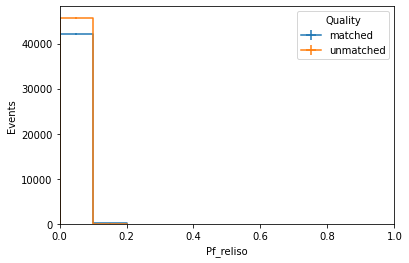

In [24]:
# histo11 = hist.Hist(
#             "Events",
#             hist.Cat("quality", "Quality"),
#             hist.Bin("pf_reliso", "Pf_reliso", 1, 0, 0.1),
#         )

# histo11.fill(quality="matched", pf_reliso=events.ElectronBPark[soft_mask_matched].pfRelIso.flatten())
# histo11.fill(quality="unmatched", pf_reliso=events.ElectronBPark[soft_mask_unmatched].pfRelIso.flatten())


# %matplotlib inline
# hist.plot1d(histo11, overflow = "over")

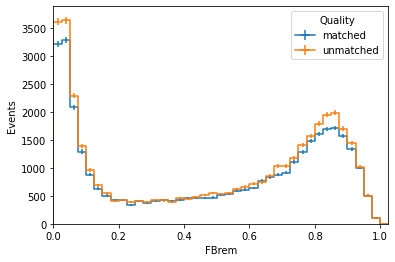

In [40]:
histo12 = hist.Hist(
            "Events",
            hist.Cat("quality", "Quality"),
            hist.Bin("fBrem", "FBrem", 40, 0, 1),
        )

histo12.fill(quality="matched", fBrem=events.ElectronBPark[soft_mask_matched].fBrem.flatten())
histo12.fill(quality="unmatched", fBrem=events.ElectronBPark[soft_mask_unmatched].fBrem.flatten())


%matplotlib inline
hist.plot1d(histo12, overflow = "over")

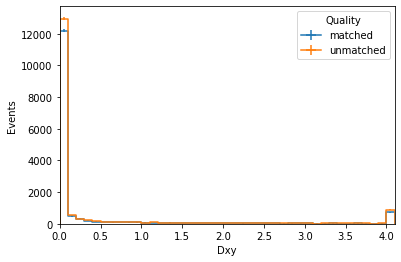

In [42]:
histo13 = hist.Hist(
            "Events",
            hist.Cat("quality", "Quality"),
            hist.Bin("dxy", "Dxy", 40, 0, 4),
        )

histo13.fill(quality="matched", dxy=events.ElectronBPark[soft_mask_matched].dxy.flatten())
histo13.fill(quality="unmatched", dxy=events.ElectronBPark[soft_mask_unmatched].dxy.flatten())


%matplotlib inline
hist.plot1d(histo13, overflow = "over")